In [1]:
import pandas as pd
import numpy as np
from lib.io import load_json
from lib.noglobal import noglobal

import warnings 
warnings.simplefilter('ignore')

In [2]:
from external_lib.NFLlib.features import add_track_features

In [3]:
from lib.io import load_pickle

helmets = load_pickle("/work/data/input/self_made_dataset/v1/helmets.pkl");
tracking = load_pickle("/work/data/input/self_made_dataset/v1/tracking.pkl");
labels = load_pickle("/work/data/input/self_made_dataset/v1/labels.pkl");


In [4]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [5]:
from external_lib.NFLlib.features import add_track_features

frame = 100

ext_helmets =  helmets[helmets["video_frame"].str.contains(f"57583_000082_Endzone") ]
ext_helmets["frame"] = ext_helmets["frame"].astype(int)
min_frame = ext_helmets["frame"].min()
max_frame = ext_helmets["frame"].max()


ext_tracking =  tracking[ (tracking["game_play"]=="57583_000082")]
ext_tracking = add_track_features(ext_tracking)

min_frame = ext_helmets["frame"].min()
max_frame = ext_helmets["frame"].max()

ext_tracking = ext_tracking[ext_tracking["est_frame"] >= (min_frame)]
ext_tracking = ext_tracking[ext_tracking["est_frame"] <= max_frame]
est_frame = find_nearest(ext_tracking["est_frame"].values,frame);
#ext_tracking = ext_tracking[ext_tracking['est_frame']==est_frame];



ext_helmets

ext_labels = labels[labels["video_frame"].str.contains(f"57583_000082_Endzone") ]

## frame 割当

### Tracking information

In [6]:
frame_list = helmets["frame"].astype(int).unique()
ext_tracking["frame"] = ext_tracking["est_frame"].apply(lambda x: find_nearest(frame_list,x));

In [7]:
#ext_tracking.sort_values("frame")
#ext_tracking["xy"] = [(x,y,5) for x,y in zip(ext_tracking["x"],ext_tracking["x"])]
ext_tracking["xyz"] = [np.array((x,y,5)) for x,y in zip(ext_tracking["x"],ext_tracking["y"])]
ext_tracking["xy"] = [np.array((x,y)) for x,y in zip(ext_tracking["x"],ext_tracking["y"])]
xy_ext_tracking_pivot = ext_tracking.pivot(index ="frame",columns="player",values = "xy")
xyz_ext_tracking_pivot = ext_tracking.pivot(index ="frame",columns="player",values = "xyz")
dir_ext_tracking_pivot = ext_tracking.pivot(index ="frame",columns="player",values = "dir")
#ext_tracking_pivot = ext_tracking.pivot(index ="frame",columns="player",values = "xy")

In [8]:
from lib.math.coodinate import generate_rotation_maxrix


In [9]:
_angle = 10

rot_mat = generate_rotation_maxrix(angle=_angle,axis="y",isDeg=True);

rot_xyz_ext_tracking_pivot = xyz_ext_tracking_pivot.copy()

players = xyz_ext_tracking_pivot.columns.tolist()

for player in  players:
    #print(player)
    #rot_ext_tracking_pivot["xyz"][player] = 
    #display()
    rot_xyz_ext_tracking_pivot[player] = xyz_ext_tracking_pivot[player].apply(lambda x: rot_mat@x)
    

In [10]:
def calc_cos_theta(x,rot_mat):
    rotated = rot_mat@x
    
    

In [11]:
xy_ext_tracking_pivot.columns

Index(['H22', 'H27', 'H30', 'H36', 'H50', 'H56', 'H59', 'H90', 'H96', 'H97',
       'H99', 'V13', 'V15', 'V34', 'V5', 'V68', 'V72', 'V73', 'V74', 'V79',
       'V86', 'V87'],
      dtype='object', name='player')

CPU times: user 83.4 ms, sys: 0 ns, total: 83.4 ms
Wall time: 107 ms


<AxesSubplot:xlabel='frame'>

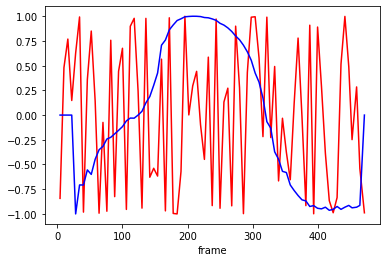

In [18]:
%%time
import numpy as np
#rot_ext_tracking_pivot
var = xy_ext_tracking_pivot - xy_ext_tracking_pivot.shift(-1)


norm = var.copy()
for player in  players:    
    fake = [0,0]
     
    norm[player] = norm[player].apply(lambda x: x if np.sqrt(x.T@x)>0.005 else np.array(fake))
    norm[player] = norm[player].apply(lambda x: (x[1]/np.sqrt(x.T@x))).fillna(0)        
    dir_ext_tracking_pivot[player+"_cos"] = np.cos(dir_ext_tracking_pivot[player])

player= "V87"

dir_ext_tracking_pivot[player+"_cos"].plot(color="red")
norm[player].plot(color="blue")

### helmets

In [13]:
ext_helmets["x"] = ext_helmets["left"] + ext_helmets["width"]/2
ext_helmets["y"] = ext_helmets["top"] + ext_helmets["height"]/2

## 推定結果

In [14]:
#sub = pd.read_csv("baseline/submission.csv")

## 正解データ

## Graph plot

In [15]:
ext_sub["team"] = ext_sub["label"].apply(lambda x: x[0])

NameError: name 'ext_sub' is not defined

In [ ]:
%%time

vis =  tracking[(tracking["game_play"]=="57583_000082")]

from external_lib.visualize import create_football_field,add_plotly_field
from external_lib.visualize import plot_field

vis = vis.copy()
vis["index"] = vis["est_frame"]


fig = plot_field(vis)
#fig.show()

In [ ]:
#fig.show()